In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
from raw_data_vis import *          

# S-curve

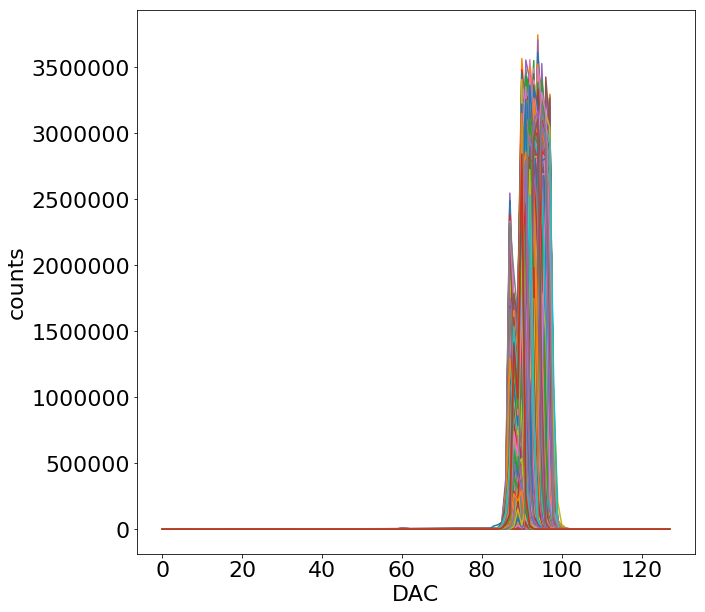

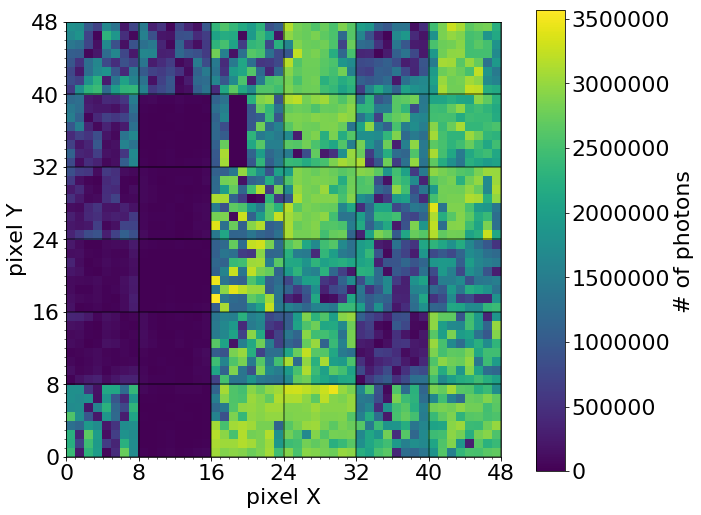

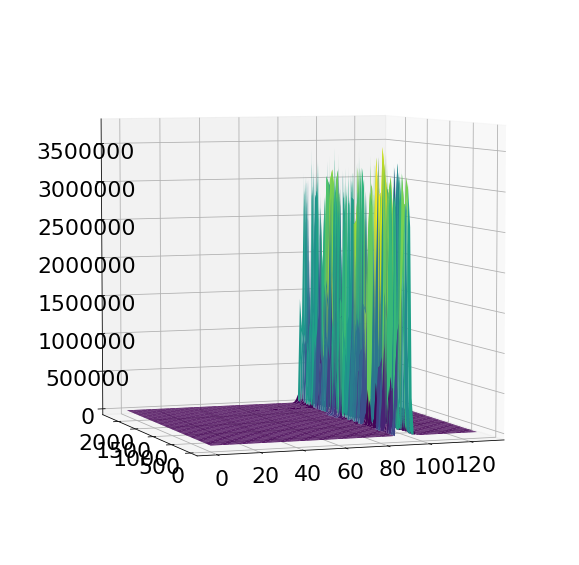

In [113]:
filepath = "/Users/fran/Dropbox/EUSO/CPU/data_format/30112017/test_files/"
sc_filename = filepath + "CPU_RUN_SC__2017_12_13__19_18_33__3600.dat"
with DataVis(sc_filename) as FileVis:
    sc_dac = 8 * 90
    FileVis.plot_sc_1d()
    FileVis.plot_sc_2d(sc_dac)
    FileVis.plot_sc_3d()

# Zynq data

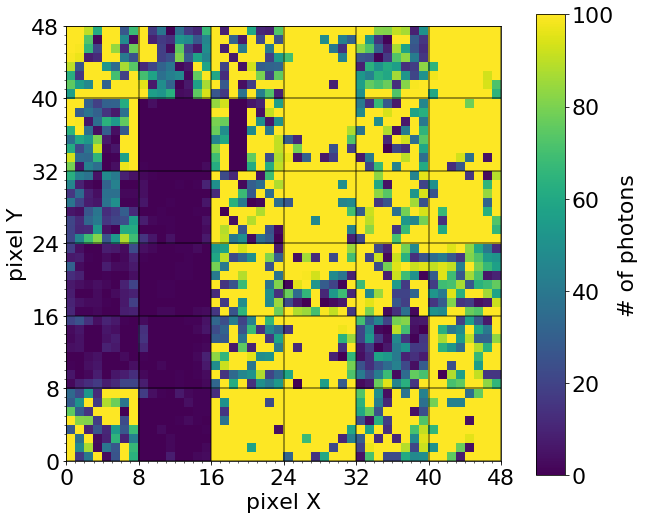

In [140]:
filepath = "/Users/fran/Dropbox/EUSO/CPU/data_format/30112017/test_files/"
filename = filepath + "CPU_RUN_MAIN__2017_12_13__19_45_29_dv_3600_hvdac_720_morelight.dat"

with DataVis(filename) as FileVis:
    FileVis.cpu_packet_num = 0
    FileVis.trig_packet_num = 0
    
    data_level = 1
    gtu_num = 100
    #gtu_range = 120
    max_counts = 100# no threshold
    #min_counts = 30
    FileVis.plot_pdm(data_level, gtu_num, max_counts)
    #plt.title('mask data')
    #plt.savefig('/Users/fran/Desktop/mask.png', bbox_inches = 'tight', transparent = True)

In [13]:
filepath = "/Users/fran/Dropbox/EUSO/CPU/tests_in_stockholm/"
filename = filepath + "CPU_RUN_MAIN__2017_10_30__17_55_33.dat"

with DataVis(filename) as FileVis:
    FileVis.cpu_packet_num = 20
    FileVis.trig_packet_num = 2
    
    FileVis._read_data()
    print FileVis.cpu_timestamp
    print FileVis.zynq_timestamp_l1
    print FileVis.zynq_timestamp_l2
    print FileVis.zynq_timestamp_l3

41754196
0
0
0


## Animate

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

# open file
filepath = "/Users/fran/Dropbox/EUSO/CPU/tor_vergata_oct2017/14_10_2017/dark_frames/"
filename = filepath + "CPU_RUN_MAIN__2017_10_14__15_55_04.dat"
FileVis = DataVis(filename)
FileVis.cpu_packet_num = 0
FileVis.trig_packet_num = 0
FileVis._read_data()
gtu_range = 126
max_counts = 0


# initialise
gtu_num = 0
fig = plt.figure(figsize = (10, 10))
focal_surface_packet = FileVis.zynq_data_l3
# get rid of dead pixels
for k in range(128):
    for i in range(48):
        for j in range(48):
            if focal_surface_packet[k][i][j] == 0:
                focal_surface_packet[k][i][j] = 0.5
flat = focal_surface_packet[0]
init_frame = focal_surface_packet[gtu_num]
if max_counts == 2000:
    im = plt.imshow(init_frame, cmap = 'viridis', 
                    animated = True, vmin = 0, origin = 'lower')
else:
    im = plt.imshow(init_frame, cmap = 'viridis', 
                    animated = True, vmin = 0.96, origin = 'lower',
                    vmax = max_counts)
plt.colorbar()

def updatefig(*args):
    global frame, gtu_num
    gtu_num += 1
    frame = focal_surface_packet[gtu_num]
    im.set_array(frame)
    return im,

# animation
anim = animation.FuncAnimation(fig, updatefig, frames = 126, interval = 200, blit = False)
HTML(anim.to_html5_video())

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
matplotlib.rcParams.update({'font.size': 22})
    
# Make a nice animation of plane
# open file
filepath = "/Users/fran/Dropbox/EUSO/CPU/tor_vergata_oct2017/14_10_2017/night/"
filename = filepath + "CPU_RUN_MAIN__2017_10_14__21_09_05.dat"

# get the two packets with plane
FileVis = DataVis(filename)
FileVis.trig_packet_num = 0
FileVis.cpu_packet_num = 16
FileVis._read_data()
packet_16 = FileVis.zynq_data_l3
FileVis1 = DataVis(filename)
FileVis1.trig_packet_num = 0
FileVis1.cpu_packet_num = 17
FileVis1._read_data()
packet_17 =  FileVis1.zynq_data_l3

gtu_range = 126
max_counts = 1.01


focal_surface_packet = np.concatenate((packet_16, packet_17), 0)
flat = focal_surface_packet[255]

# initialise
gtu_num = 0
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
init_frame = focal_surface_packet[gtu_num]/flat
cmap = plt.cm.get_cmap("viridis")
cmap.set_under()
if max_counts == 0:
    im = plt.imshow(init_frame, cmap = cmap, animated = True, 
                    vmin = 0, origin = 'lower')
else:
    im = plt.imshow(init_frame, cmap = cmap, animated = True, 
                    vmin = 0.98, origin = 'lower',
                    vmax = max_counts)

plt.title('GTU_L3: ' + str(gtu_num))

# Set ticks
major_ticks = np.arange(-.5, 48, 8)
minor_ticks = np.arange(-.5, 48, 1)
#ax.set_xlim(0.0,47.0)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_xticklabels(np.arange(0, 49, 8));
ax.set_yticklabels(np.arange(0, 49, 8));

# Set grid
#ax.grid(which='minor', alpha=0.2)
ax.grid(color='k', linestyle='-', linewidth=2)
ax.grid(which='major', alpha=0.4)

# Add colourbar
cbar=plt.colorbar(extend='min')
#cbar.set_label('# of photons', x = 1.2)
cbar.formatter.set_powerlimits((0, 0))


def updatefig(*args):
    global frame, gtu_num
    gtu_num += 1
    frame = focal_surface_packet[gtu_num]/flat
    im.set_array(frame)
    plt.title('GTU_L3: ' + str(gtu_num), y = 1.1)
    return im,

# animation
anim = animation.FuncAnimation(fig, updatefig, frames = 253, 
                               interval = 200, blit = False)

#anim.save("/Users/fran/Downloads/plane.mp4")
HTML(anim.to_html5_video())